# Scrapping Google Review

Tahap awal dari analisis ini adalah melakukan scrapping pada Google Maps Review. Digunakan package selenium dengan bantuan webdriver dan Beautiful Soup 4 untuk melakukan scrapping html

In [2]:
import pandas as pd
import os
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import numpy as np
from tqdm import tqdm

## Create Function

In [8]:
def _scrapping_google_review(url):
    path_chromedriver = os.path.join(os.getcwd(),"chromedriver_win32\chromedriver.exe")
    driver = webdriver.Chrome(path_chromedriver)
    #Website
    driver.get(url)

    time.sleep(10)
    
    #Find the review button
    rev_button = '//*[@id="QA0Szd"]/div/div/div[1]/div[2]/div/div[1]/div/div/div[2]/div[1]/div[1]/div[2]/div/div[1]/div[2]/span/span/span[2]'
    driver.find_element(By.XPATH, rev_button).click()
    
    time.sleep(10)
    
    #Find name
    num_rev = '//*[@id="QA0Szd"]/div/div/div[1]/div[2]/div/div[1]/div/div/div[2]/div[2]/div/div[2]/div[2]'
    total_number_of_reviews = driver.find_element(By.XPATH,num_rev).text.split(" ")[0]
    total_number_of_reviews = int(total_number_of_reviews.replace('.','')) if '.' in total_number_of_reviews else int(total_number_of_reviews)
    
    print(f'Total Number of Reviews: {total_number_of_reviews}')
    print()
    time.sleep(20)
    print('Loading all reviews...')

    #Load all reviews by scrolling down
    scroll = '//*[@id="QA0Szd"]/div/div/div[1]/div[2]/div/div[1]/div/div/div[2]'
    scrollable_div = driver.find_element(By.XPATH,scroll)

    total_rev = round(total_number_of_reviews/10)
    if total_rev > 100:
        total_rev = 120
    else:
        pass

    for i in tqdm(range(0,(total_rev))):
        driver.execute_script('arguments[0].scrollTop = arguments[0].scrollHeight', 
                    scrollable_div)
        time.sleep(2)
    print('Load finished')

    more_button_xpath = 'w8nwRe.kyuRq'
    more_button = driver.find_elements(By.CLASS_NAME,more_button_xpath)
    total_button = len(more_button)
    print()
    print('Expanding Review..')

    for i in tqdm(range(total_button)):
        driver.find_element(By.CLASS_NAME,more_button_xpath).click()

    time.sleep(5)
    
    #Parse HTML
    response = BeautifulSoup(driver.page_source, 'html.parser')

    #Get all reviews
    reviews = response.find_all('div', class_='jJc9Ad')

    print(f'Total Number of Reviews Scrapped: {len(reviews)}')
    return reviews

In [4]:
def _get_review_summary(result_set):
    rev_dict = {
        'Name' : [],
        'Status': [],
        'Number of Review' :[],
        'Review Rate': [],
        'Review Time': [],
        'Review Text' : []}
        
    for result in result_set:
        review_name = result.find('div', class_ = 'd4r55').text
        try:
          review = result.find('div', class_ = 'RfnDt').text
          if review.startswith('Local Guide'):
            review_status = 'Local Guide'
          else:
            review_status = '-'
          
          try:
            review_num = review.strip('Local Guide · ')
          except:
            review_num = review

        except:
          review = 'Uncategorized'
        review_rate = result.find('span', class_='kvMYJc')["aria-label"]
        review_time = result.find('span',class_='rsqaWe').text     
        review_text = result.find('span',class_='wiI7pd').text
        rev_dict['Name'].append(review_name)
        rev_dict['Status'].append(review_status)
        rev_dict['Number of Review'].append(review_num)
        rev_dict['Review Rate'].append(review_rate)
        rev_dict['Review Time'].append(review_time)
        rev_dict['Review Text'].append(review_text)   
    return(pd.DataFrame(rev_dict))

In [5]:
url_tanjungperak = ['https://goo.gl/maps/sVHB1mNji9JPwraf8',
                    'https://goo.gl/maps/RFfk3iLyH6BevQWj9',
                    'https://goo.gl/maps/Wsy7K8MhCqkFJx9t6',
                    'https://goo.gl/maps/RinsTcSfiPmRLNeJ6',
                    'https://goo.gl/maps/YEEFBNzjVkAwTfPCA',
                    ]
url_roro = ['https://goo.gl/maps/EYhHYXLECArriu9u7',
            'https://goo.gl/maps/uLDkqxXNR4ZC1z529']

url_gsn = 'https://goo.gl/maps/DByBkroEE9mNyViw6'

url_snq = 'https://goo.gl/maps/gsBXNFypwh8ZJyvw6'

url_jamrud = ['https://goo.gl/maps/aS69R1iNvARqafqYA',
              'https://goo.gl/maps/M55TQDMd6vg4GCY77',
              'https://goo.gl/maps/4pdb5mdyNxtPGRy87',
              'https://goo.gl/maps/MNhgoCV25weA1jUb8',
              'https://goo.gl/maps/FK3f5m518AiaweW96']

## Places

## Roro

In [8]:
roro = []

for i in url_roro:
    a = _scrapping_google_review(i)
    roro.append(a)

C:\Users\Ahmad Ulfi\AppData\Local\Temp\ipykernel_16880\1756425134.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path_chromedriver)


Total Number of Reviews: 4

Loading all reviews...


0it [00:00, ?it/s]


Load finished

Expanding Review..


100%|██████████| 1/1 [00:00<00:00,  4.77it/s]


Total Number of Reviews Scrapped: 4
Total Number of Reviews: 33

Loading all reviews...


100%|██████████| 3/3 [00:06<00:00,  2.14s/it]


Load finished

Expanding Review..


0it [00:00, ?it/s]


Total Number of Reviews Scrapped: 33


In [10]:
a = 1
for i in roro:
  review = _get_review_summary(i)
  name = f'Google Map Review Roro {a}.xlsx'
  review.to_excel(name)
  a+=1

## Gapura Surya Nusantara (GSN)

In [12]:
gsn = _scrapping_google_review(url_gsn)

C:\Users\Ahmad Ulfi\AppData\Local\Temp\ipykernel_16880\4219958328.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path_chromedriver)


Total Number of Reviews: 120

Loading all reviews...


100%|██████████| 12/12 [00:24<00:00,  2.07s/it]


Load finished

Expanding Review..


100%|██████████| 11/11 [00:05<00:00,  2.15it/s]


Total Number of Reviews Scrapped: 120


In [13]:
review_gsn = _get_review_summary(gsn)
review_gsn.to_excel('Google Map Review GSN.xlsx')

## Tanjung Perak

In [9]:
tjperak = []

for i in url_tanjungperak:
    a = _scrapping_google_review(i)
    tjperak.append(a)

C:\Users\Ahmad Ulfi\AppData\Local\Temp\ipykernel_16660\638011662.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path_chromedriver)


Total Number of Reviews: 2186

Loading all reviews...


100%|██████████| 120/120 [04:03<00:00,  2.03s/it]


Load finished

Expanding Review..


100%|██████████| 48/48 [00:03<00:00, 13.68it/s]


Total Number of Reviews Scrapped: 930
Total Number of Reviews: 920

Loading all reviews...


100%|██████████| 92/92 [03:07<00:00,  2.04s/it]


Load finished

Expanding Review..


100%|██████████| 24/24 [00:11<00:00,  2.12it/s]


Total Number of Reviews Scrapped: 870
Total Number of Reviews: 435

Loading all reviews...


100%|██████████| 44/44 [01:31<00:00,  2.09s/it]


Load finished

Expanding Review..


100%|██████████| 5/5 [00:00<00:00,  8.99it/s]


Total Number of Reviews Scrapped: 100
Total Number of Reviews: 24

Loading all reviews...


100%|██████████| 2/2 [00:04<00:00,  2.02s/it]


Load finished

Expanding Review..


100%|██████████| 1/1 [00:00<00:00,  7.60it/s]


Total Number of Reviews Scrapped: 24
Total Number of Reviews: 78

Loading all reviews...


100%|██████████| 8/8 [00:16<00:00,  2.02s/it]


Load finished

Expanding Review..


100%|██████████| 2/2 [00:00<00:00,  5.89it/s]


Total Number of Reviews Scrapped: 78


In [16]:
tjperak[1] = _scrapping_google_review(url_tanjungperak[1])
tjperak[2] = _scrapping_google_review(url_tanjungperak[2])

C:\Users\Ahmad Ulfi\AppData\Local\Temp\ipykernel_16660\638011662.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path_chromedriver)


Total Number of Reviews: 920

Loading all reviews...


100%|██████████| 92/92 [03:21<00:00,  2.19s/it]


Load finished

Expanding Review..


100%|██████████| 24/24 [00:08<00:00,  2.74it/s]


Total Number of Reviews Scrapped: 910
Total Number of Reviews: 435

Loading all reviews...


100%|██████████| 44/44 [01:29<00:00,  2.03s/it]


Load finished

Expanding Review..


100%|██████████| 8/8 [00:01<00:00,  4.65it/s]


Total Number of Reviews Scrapped: 420


In [17]:
a = 1
for i in tjperak:
  review = _get_review_summary(i)
  name = f'Google Map Review Tanjung Perak {a}.xlsx'
  review.to_excel(name)
  a+=1

## Surabaya North Quay

In [18]:
snq = _scrapping_google_review(url_snq)

C:\Users\Ahmad Ulfi\AppData\Local\Temp\ipykernel_16660\638011662.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path_chromedriver)


Total Number of Reviews: 18880

Loading all reviews...


100%|██████████| 120/120 [04:04<00:00,  2.04s/it]


Load finished

Expanding Review..


100%|██████████| 289/289 [00:22<00:00, 12.58it/s]


Total Number of Reviews Scrapped: 930


In [19]:
review_snq = _get_review_summary(snq)

review_snq.to_excel('Google Map Review SNQ.xlsx')

### Jamrud

In [20]:
num = 1

for i in url_jamrud:
    a = _scrapping_google_review(i)
    review = _get_review_summary(a)
    name = f'Google Map Review Jamrud {num}.xlsx'
    review.to_excel(name)
    num+=1

C:\Users\Ahmad Ulfi\AppData\Local\Temp\ipykernel_16660\638011662.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path_chromedriver)


Total Number of Reviews: 248

Loading all reviews...


100%|██████████| 25/25 [00:50<00:00,  2.03s/it]


Load finished

Expanding Review..


100%|██████████| 6/6 [00:00<00:00,  7.58it/s]


Total Number of Reviews Scrapped: 180
Total Number of Reviews: 471

Loading all reviews...


100%|██████████| 47/47 [01:35<00:00,  2.02s/it]


Load finished

Expanding Review..


100%|██████████| 14/14 [00:02<00:00,  5.59it/s]


Total Number of Reviews Scrapped: 470
Total Number of Reviews: 250

Loading all reviews...


100%|██████████| 25/25 [00:50<00:00,  2.02s/it]


Load finished

Expanding Review..


100%|██████████| 6/6 [00:00<00:00,  6.07it/s]


Total Number of Reviews Scrapped: 250
Total Number of Reviews: 15

Loading all reviews...


100%|██████████| 2/2 [00:04<00:00,  2.02s/it]


Load finished

Expanding Review..


100%|██████████| 1/1 [00:00<00:00,  9.93it/s]


Total Number of Reviews Scrapped: 15
Total Number of Reviews: 85

Loading all reviews...


100%|██████████| 8/8 [00:16<00:00,  2.02s/it]


Load finished

Expanding Review..


100%|██████████| 2/2 [00:00<00:00, 10.78it/s]


Total Number of Reviews Scrapped: 85


# Cleaning Data

In [21]:
import re

In [22]:
def _remove_emoji(string):
    '''Membersihkan Emoji'''
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r' ', string)

## Word Cloud

In [290]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [298]:
kata_wordcloud = []
for word in df_cleanstop['Review Text']:
    temp = [w for w in word]   

In [379]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(wordcloud)

In [428]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
stop_factory = StopWordRemoverFactory()
more_stopword = ['dengan', 'ia','bahwa','oleh','pelabuhan','kapal','tanjung']
stop_word = stop_factory.get_stop_words()+more_stopword

In [469]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words= stopwords.words('indonesian')
extend = ['pelabuhan','tanjung','pelindo','indonesia','yg','nya','perak','priok','timur','surabaya','keren','bagus','gak','kapal','bersih','nyaman','mantap']
stop_words.extend(extend)

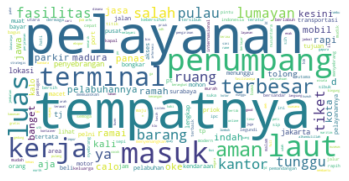

In [470]:
wordcloud = ""
for text in clean_review['Review Text']:
    wordcloud += text + " "
    
filtered_words = [Word for Word in wordcloud.split() if Word not in stop_words]

kata = ""
for text in filtered_words:
    kata += text + "  "

word_cloud = WordCloud(collocations = False, background_color = 'white').generate(kata)

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [301]:
import re
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import math
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict

<bound method Downloader.download of <nltk.downloader.Downloader object at 0x0000019AE6E1FD90>>

In [ ]:
from nltk.corpus import stopwords
#nltk.download('popular')


In [319]:
stop_words = set(stopwords.words('indonesian'))
clean_review['Review Text'] = clean_review['Review Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [320]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

In [323]:
def lemmatize_text(text):
    st = ""
    for w in w_tokenizer.tokenize(text):
        st = st + lemmatizer.lemmatize(w) + " "
    return st
clean_review['Review Text'] = clean_review['Review Text'].apply(lemmatize_text)

In [326]:
rev = clean_review['Review Text']
lab = clean_review['Review Rate']
encoder = LabelEncoder()
encoded = encoder.fit_transform(lab)

In [328]:
train_sentences, test_sentences, train_labels, test_labels = train_test_split(rev, encoded, stratify = encoded)

## Naive Bayes

In [329]:
vec = CountVectorizer(max_features = 3000)
X = vec.fit_transform(train_sentences)
vocab = vec.get_feature_names()
X = X.toarray()
word_counts = {}
for l in range(2):
    word_counts[l] = defaultdict(lambda: 0)
for i in range(X.shape[0]):
    l = train_labels[i]
    for j in range(len(vocab)):
        word_counts[l][vocab[j]] += X[i][j]

c:\Users\Ahmad Ulfi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [330]:
def laplace_smoothing(n_label_items, vocab, word_counts, word, text_label):
    a = word_counts[text_label][word] + 1
    b = n_label_items[text_label] + len(vocab)
    return math.log(a/b)

In [331]:
def group_by_label(x, y, labels):
    data = {}
    for l in labels:
        data[l] = x[np.where(y == l)]
    return data

In [336]:
def fit(x, y, labels):
    n_label_items = {}
    log_label_priors = {}
    n = len(x)
    grouped_data = group_by_label(x, y, labels)
    for l, data in grouped_data.items():
        n_label_items[l] = len(data)
        log_label_priors[l] = math.log(n_label_items[l] / n)
    return n_label_items, log_label_priors

In [337]:
def predict(n_label_items, vocab, word_counts, log_label_priors, labels, x):
    result = []
    for text in x:
        label_scores = {l: log_label_priors[l] for l in labels}
        words = set(w_tokenizer.tokenize(text))
        for word in words:
            if word not in vocab: continue
            for l in labels:
                log_w_given_l = laplace_smoothing(n_label_items, vocab, word_counts, word, l)
                label_scores[l] += log_w_given_l
        result.append(max(label_scores, key=label_scores.get))
    return result

In [338]:
labels = [0,1]
n_label_items, log_label_priors = fit(train_sentences,train_labels,labels)
pred = predict(n_label_items, vocab, word_counts, log_label_priors, labels, test_sentences)
print("Accuracy of prediction on test set : ", accuracy_score(test_labels,pred))

KeyError: 'key of type tuple not found and not a MultiIndex'

# Dari Github

In [339]:
import pandas as pd
from sklearn.model_selection import train_test_split
import joblib
from sklearn.feature_extraction.text import CountVectorizer

In [340]:
# Split into training and testing data
x = clean_review['Review Text']
y = clean_review['Review Rate']
x, x_test, y, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=42)

In [344]:
# Vectorize text reviews to numbers
vec = CountVectorizer(stop_words='english')
x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()

1097    1
703     0
1323    1
373     1
68      0
       ..
1276    1
967     0
989     0
1256    1
109     1
Name: Review Rate, Length: 1104, dtype: object

In [345]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x, y)

ValueError: Unknown label type: (array([1, 0, 1, ..., 0, 1, 1], dtype=object),)